In [6]:
!pip install -q oauth2client==1.5.2
import sys
sys.path.append("./utils/student_function/")

In [ ]:
from mooclib import *
import inspect, urllib
html, auth_code, userinfo = google_authenticate(PORT_NUMBER=8080)
html

### Heapsort

En este taller vamos a implementar el algoritmo de ordenación llamado Heapsort. Consulta [Heapsort en Wikipedia](https://en.wikipedia.org/wiki/Heapsort). Es un algoritmo que, dado un vector:

- Lo interpreta como un árbol binario
- **Fase 1**: Lo convierte en un **Heap**, es decir, un árbol binario en el que cualquier padre tiene un valor mayor que sus hijos. Esto garantiza que la raíz sea el nodo con mayor valor.
- **Fase 2**: Ordena el **Heap** de forma que, sucesivamente, va pasando la raíz al final del árbol

Usaremos como base la clase de las notas

In [ ]:
%%writefile ./utils/student_function/PS06.py
import numpy as np
class VBinTree(object):
    
    def __init__(self, v):
        self.v = np.r_[[i for i in v]] # copy
        
    def get_height(self):
        i,c=0,0
        while c<len(self.v):
            c += 2**i
            i += 1
        return i-1
    
    def get_level(self, i):
        n = 0
        while sum([2**j for j in range(n)])<=i:
            n+=1
        return n-1
    
    def get_children_positions(self, i):
        return (2*i+1 if 2*i+1<len(self.v) else None,\
                2*i+2 if 2*i+2<len(self.v) else None)
    
    def get_parent_position(self, i):
        assert type(i)==int and i>=0
        return (i-1)/2 if i!=0 else None

    def get_sibling_position(self, i):
        if i==0:
            return None
        return [k for k in self.get_children_positions(self.get_parent_position(i)) if k!=i][0]
  

    def to_indented_string(self, i, level):
        c = self.get_children_positions(i)
        s = (" "*2*level + str(self.v[i]) + "\n") if self.v[i] is not None else ""
        s += self.to_indented_string(c[0],level+1) if c[0] is not None else ""
        s += self.to_indented_string(c[1],level+1) if c[1] is not None else ""
        return s
    
    def __repr__(self):
        return self.to_indented_string(0,0)

### Ejercicio 1
Implementa el método `shift_down` para que descienda cualquier elemento hasta un punto en el que sus dos hijos son menores, sin pasarse de la posición `end`.

Recuerda que:

- `sefl.v` es un vector que almacena todos los elementos del array en un orden predeterminado.
- `self.get_children_positions` te da en qué lugar de ese vector están almacenados los hijos de un cierto nodo.
- `start` es la posición del nodo que queremos desplazar.
- `end` es la posición más alta en la que se puede desplazar el nodo.

Sugerencia de pseudo código:

    1. pos_nodo = start
    2. mientras pos_nodo tenga hijos y pos_nodo<=end
    3.    intercambiar el valor del nodo por cualquiera de los hijos que sea menor y que no esté más allá de end.
    4.    si no se intercambió el nodo, finalizar
    

ejemplo de ejecución:

    import PS06_01 as st
    reload(st)
    v = [5,9,4,1,6,2,8,3]
    print st.VBinTree(v)
    print st.VBinTree(v).shift_down(0)
    print st.VBinTree(v).shift_down(1)
    print st.VBinTree(v).shift_down(3)
    
salida esperada:

    5
      9
        1
          3
        6
      4
        2
        8

    9
      6
        1
          3
        5
      4
        2
        8

    5
      9
        1
          3
        6
      4
        2
        8

    5
      9
        3
          1
        6
      4
        2
        8

In [260]:
%%writefile ./utils/student_function/PS06_01.py
import PS06
class VBinTree(PS06.VBinTree):
    
    def shift_down(self, start, end=None):
        end = len(self.v)-1 if end is None else end
        root = start
        while self.get_children_positions(root)[0] is not None and self.get_children_positions(root)[0]<=end:
            
            # .. TU CODIGO AQUI
            
        return self

Overwriting ./utils/student_function/PS06_01.py


prueba los siguientes valores de i:
- 0 (==5, el nodo root), fíjate hasta donde se mueve
- 1 (==9, no se mueve)
- 3 (==1, se intercambia con el 3)

In [261]:
import PS06_01 as st
reload(st)
v = [5,9,4,1,6,2,8,3]
b = st.VBinTree(v)
print b
i=1
print "shifting down element",i,"whose value is", b.v[i]
b.shift_down(i)
print b

5
  9
    1
      3
    6
  4
    2
    8

shifting down element 1 whose value is 9
5
  9
    1
      3
    6
  4
    2
    8



#### comprueba tu código con el corrector automático

In [ ]:
!./run CHECK_SOLUTION PS06_01

#### registra tu solución en línea

In [ ]:
!./run SUBMIT_SOLUTION PS06_01

## Ejercicio 2

tendremos que hacer un recorrido desde el último nodo que sea padre en el árbol, hasta el primero, llamando al método del ejercicio anterior.

para ello, implementaremos primero un método `get_past_parent_position` que, dado un árbol, encuentre la posición del último padre en el vector (que puede tener uno o dos hijos), pero no ninguno.

In [267]:
%%writefile ./utils/student_function/PS06_02.py
import PS06
class VBinTree(PS06.VBinTree):
        
    def get_last_parent_position(self):
        for i in range(len(self.v)-1,-1,-1):
            
            # ... TU CODIGO AQUI ...

        return None

Overwriting ./utils/student_function/PS06_02.py


**ejemplo de ejecución**: para los siguientes dos árboles, la posición del último padre ha de ser 4 y 2 respectivamente

In [268]:
import PS06_02 as st
reload(st)
for v in [[5,9,0,1,6,2,8,3,4,5], [5,9,0,1,6,2,8]]:
    b = st.VBinTree(v)
    print "\n\ntree:"
    print b
    p = b.get_last_parent_position()
    print "last parent position",p, "content", b.v[p]



tree:
5
  9
    1
      3
      4
    6
      5
  0
    2
    8

last parent position 4 content 6


tree:
5
  9
    1
    6
  0
    2
    8

last parent position 2 content 0


#### comprueba tu código con el corrector automáticom

In [ ]:
!./run CHECK_SOLUTION PS06_02

#### registra tu solución en línea


In [ ]:
!./run SUBMIT_SOLUTION PS06_02

## Ejercicio 3

complela el método `make_heap` con un bucle desde el último padre hasta el primer elemento del árbol (su vector) realizando el `shift_down` de cada elemento. Con esto conseguimos que nuestra lista sea un `Heap`. 


In [274]:
%%writefile ./utils/student_function/PS06_03.py
import PS06
class VBinTree(PS06.VBinTree):

    def shift_down(self, start, end=None):
        
        # ... TU CODIGO AQUI ...
        
        return self
        
    def get_last_parent_position(self):
        
        # ... TU CODIGO AQUI ...
    
    def make_heap(self):

        # ... TU CODIGO AQUI ...


Overwriting ./utils/student_function/PS06_03.py


In [275]:
import PS06_03 as st
reload(st)

v = list(np.random.permutation(100)[:10])
#v = [2,48,65,95,66,42,30,32]
b = st.VBinTree(v)
print "-- original tree"
print b
print "-- constructed heap"
b.make_heap()
print
print b

-- original tree
49
  33
    73
      74
      13
    66
      47
  37
    99
    30

-- constructed heap

99
  74
    73
      33
      13
    66
      47
  49
    37
    30



#### comprueba tu código con el corrector automático

In [ ]:
!./run CHECK_SOLUTION PS06_03

#### registra tu solución en línea

In [ ]:
!./run SUBMIT_SOLUTION PS06_03

## Ejercicio 4

Finalmente, sobre el árbol resultado del ejercicio anterior, en un bucle desde el último nodo hasta el primero, intercambiamos la raíz con dicho nodo.

**Pseudocódigo sugerido**:

    1. desde nodo=último nodo hasta el primero
    2.    intercambia el valor de la raíz del árbol con nodo
    3.    haz un shift_down de la raíz del árbol hasta nodo-1



In [281]:
%%writefile ./utils/student_function/PS06_04.py
import PS06
class VBinTree(PS06.VBinTree):

    def shift_down(self, start, end=None):

        # ... TU CODIGO AQUI ...
        
    def get_last_parent_position(self):

        # ... TU CODIGO AQUI ...
    
    def make_heap(self):

        # ... TU CODIGO AQUI ...
                
    def sort(self):

        # ... TU CODIGO AQUI ...
    


Overwriting ./utils/student_function/PS06_04.py


comprueba tu código

In [282]:
import PS06_04 as st
v = list(np.random.permutation(100)[:15])

b = st.VBinTree(v)
print "-- original tree"
print b.v

b.sort()
print "-- sorted tree"
print b.v

-- original tree
[77 83 59 29 28 58 22 67  3 45 72 82 10 43 85]
-- sorted tree
[ 3 10 22 28 29 43 45 58 59 67 72 77 82 83 85]


#### comprueba tu código con el corrector automático

In [ ]:
!./run CHECK_SOLUTION PS06_04

#### registra tu solución en línea

In [ ]:
!./run SUBMIT_SOLUTION PS06_04

## YA ACABASTE EL TALLER



### Complejidad computacional

Comprobamos experimentalmente que la complejidad computacional es $\mathcal{O}(n\log n)$. Fíjate que la notación $\mathcal{O}$ es un orden de magnitud que es independiente sumas y multiplicaciones por una constante. Para ajustar las mediciones del experimento al ideal de  $\mathcal{O}(n\log n)$ tenemos que calcular esa constante. ¿Dónde la calculamos en el código?

In [254]:
def heapsort_experiment(n):
    import PS06_04 as st
    v = list(np.random.permutation(n*5)[:n])
    b = st.VBinTree(v)
    b.sort()
    return

In [256]:
n_set = np.arange(0,4100,500)[1:]
s_times = []
for n in n_set:
    print n,
    t = %timeit -o -q heapsort_experiment(n)
    s_times.append(t.best)

500 1000 1500 2000 2500 3000 3500 4000


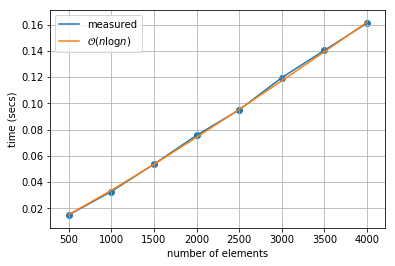

In [257]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(n_set, s_times, label="measured")
plt.scatter(n_set, s_times)
log = n_set*np.log(n_set)
log = log*np.mean(s_times/log)

plt.plot(n_set, log, label="$\mathcal{O} (n\log n)$")
plt.legend()
plt.grid()
plt.xlabel("number of elements")
plt.ylabel("time (secs)");

pero fíjate que en el experimento no tenemos la operación de `sort` aislada. Verificamos por tanto que el tiempo de creación de un vector aleatorio es despreciable respecto a nuestro experimento

500 1000 1500 2000 2500 3000 3500 4000 4500 5000


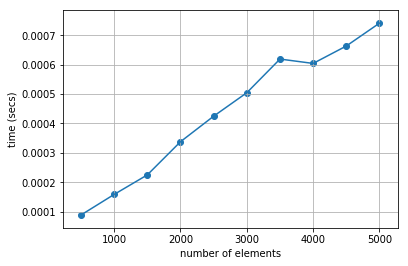

In [258]:
def randomlist_experiment(n):
    v = list(np.random.permutation(n*5)[:n])
    
n_set = np.arange(0,5500,500)[1:]
r_times = []
for n in n_set:
    print n,
    t = %timeit -r 10 -n 10 -o -q randomlist_experiment(n)
    r_times.append(t.best)
    
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(n_set, r_times)
plt.scatter(n_set, r_times)
plt.grid()
plt.xlabel("number of elements")
plt.ylabel("time (secs)");